# <font color='orange'> Numerical Exercises 9 </font>
The goal of this exercises is to face and possibly find the solution of the **Traveling Salesman Problem (TSP)** via a **Genetic Algorithm (GA)** in two dimensions in the following settings:

- 32 cities randomly placed on a *circumference*
- 32 cities randomly placed inside a *square*

To do this I decide to create my code using the *C++ Object Oriented programming paradigm* (and everything that it implies, e.g. *Copy Constructor*, *Copy Assignment*, etc...) and exploit the *Standard Library*.

## <font color='blue'>Exercise 09.1</font>

Firstly I choose the suggested $ 1D $-vector representation for the single path.
The fundamental elements of this vector are, in a biological view, the **genes**, whose sequence forms the **chromosome**,i.e. the path between the cities, which will constitute the single individual of the population I want to build. Hence, I create the <font color='green'>*Class Gene*</font> to manage the essential object of the TSP, the single city, characterized by an integer that identifies it (the *allele* in a genetic language, from $ 1 $ to $ 32 $), an integer $ d $ that expresses the dimensionality of the problem (in this case $ d=2 $) and a position vector $ \vec{x} $ that indicates its location in the $ d $-dimensional space. In my code, every <font color='green'>*Gene* $ g_i $</font> has the ability to calculate the distance between itself and another <font color='green'>*Gene* $ g_j $</font> as *Euclidean norm*

$$ L_{ij} = \vert \vec{x}_{g_i} - \vec{x}_{g_j} \vert^2 $$

Defined the essential block of my code structure, I proceed with the representation of the single individual of a population through the <font color='green'>*Class Chromosome*</font>. A <font color='green'>*Chromosome*</font> is a sequence of <font color='green'>*Genes*</font>, whose order of appearance determines the path taken by the salesman. In fact this class is described by the following *private* data-members:

- an integer number which expresses the length of the path, i.e. the number of cities of the TSP;
- a vector of <font color='green'>*Genes*</font> (<font face="Courier">std::vector < <font color='green'>*Class 
  Gene*</font> ></font>) as explained before;
- a double-value *Cost Function*
  
  $$ 
    L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_{N_{city}}) = \sum_{i=1}^{N_{city}} |\vec{x}_i-\vec{x}_{i+1}|^2 
  $$
  
  (with $ \vec{x}_{N+1}=\vec{x}_1 $) which must be minimized through the GA and represents the length of the 
  particular path described by the <font color='green'>*Chromosome*</font>.
  
This object is also equipped with a *check function* that allows to ensure that the individual described by it meets all the constraints of the problem: the salesman has to visit each one of the cities always starting from city $ 1 $ (the hometown, in my structure that particular <font color='green'>*Gene*</font> marked by *allele* $ = 1 $) and returning to the same city.


And now the heart of the algorithm: the <font color='green'>*Class Evolution*</font>.
This class manages the (*genetic*) evolution over time of a population of individuals, which I mean as a vector of <font color='green'>*Chromosomes*</font> (<font face="Courier">std::vector < <font color='green'>*Class Chromosome* </font> ></font>) following the logic described so far; the data-members are:

- an integer which expresses the number of individuals $ N_{ind} $ making up the population;
- the vector of <font color='green'>*Chromosome*</font> which describes the population of possible paths;
- two <font color='green'>*Chromosome*</font>, <font color='green'>*best*</font> and 
  <font color='green'>*worst*</font>, that describe the best and the worst paths of the population, based on 
  the *Cost Function* defined above.
  
I implement *selection*, *mutation* and *crossover* operators within this class, as suggested in the exercise text; obviously the object <font color='green'>*Evolution*</font> is able to update the population, as well as the best and the worst path, during the application of these operators, i.e. during the time evolution of the various individuals.

At this point the simulation consists in evolving a population up to the $ N_{step} $ generation, starting from an initial one of $ N_{ind} $ individuals whose paths are generated with a random sequence of <font color='green'>*Genes*</font>.
As in any optimization algorithm, an important issue is that of the so-called *hyper-parameters*, i.e. those external parameters that the user must set by hand without a real theory at the base. For example, the *selection algorithm* I use is the so-called **"Roulette Wheel Selection"**: given a vector-population of $ N_{ind} $ individuals ordered according to a certain fitness (in this case the *Cost Function*), select one element of this vector through the function

$$ index = \color{green}{int}(N_{ind} \times r^p) + 1 $$

with $ r $ a random number uniformly distributed in $ [0, 1) $; in this case the hyper-parameter that must be fixed is the exponent $ p $, which I decide to choose through the plot that I show below.

<img src="hyper-parameter_p.png" width="700" align='center'>

In practice, considering a population of $ N_{ind} = 100 $ individuals, I showed $ 100 $ inidices selected through the algorithm described above, using $ 10 $ different values for the exponent $ p $, taken as it gets bigger and bigger. Based on the curves obtained I choose to fix $ \color{red}{p = 2.5} $ in my simulation, in order to have a good compromise between *high probability of selecting the first individuals* (the vector is ordered in ascending order in the length of the path) and a good *genetic recombination* during the crossover, i.e. I try to select different individuals to allow crossings even with less fitness <font color='green'>chromosomes</font>. In fact the probability of choosing an individual describing a long path is too much higher than selecting a "good" one by taking $ p \in [0.1, 1.0] $; on the other hand for values of $ p $ too high there is the risk of selecting always and only the first individuals of the population; the curves that have $ p \in [1.5, 3.0] $ instead would seem to meet the idea behind my algorithm.


Addressed the question of selection, I am ready to evolve the initial population: for each generation I select two parents, I apply the crossover between these two individuals with a certain probability, and I give birth to two children; I always apply the suggested mutations with a certain probability on these two sons, and I go on with this procedure until I have generated $ N_{ind} $ new individuals; at this point I replace the original population with this new one and I repeat the evolution over time.
Note that in cases where the algorithm does not perform the crossover, the two parents themselves are considered in the new generation and undergo only the genetic mutations procedure.


Specifically I do the first simulation in the case of *cities on a circumference*, using the parameters described in the table below. Apart the exponent $ p $, the other hyper-parameters are chosen based on what is suggested by the exercise text and a series of hand-made attempts.<br>
This first simulation is needed to understand whether my code works or not: understand what is the best path that travel all the cities placed on a circumference is simple, unlike what happens in the case related to the square.<br>
I show below the minimization of the Cost Function as a function of the generations and the best path obtained at the end of the optimization.

| Parameter                          | Symbol       | Value      |
| :-------:                          | :----:       | :---:      |
| Optimization steps (#generations)  | $ N_{step} $ | $ 600 $    |
| Number of individuals              | $ N_{ind} $  | $ 100 $    |
| Pair Permutation probability       | $ p_{PP} $   | $ 5 \% $   |
| Contiguous Permutation probability | $ p_{CP} $   | $ 6 \% $   |
| Inversion probability              | $ p_{IN} $   | $ 7 \% $   |
| Selection exponent                 | $ p $        | $ 2.5 $    |
| Crossover probability              | $ p_{CR} $   | $ 80 \% $  |
| Circumference radius               | $ r $        | $ 1.0 $    |

In [1]:
#Modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from IPython.display import HTML, Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
###################
#load the data
###################
#Cost Function
N_city = 32
generation, L_circ = np.loadtxt("09.1/Circumference/L.dat", usecols=(0,1), unpack=True)
L_ave_circ = np.loadtxt("09.1/Circumference/L_ave.dat", usecols=1)


#Best Path
paths = np.loadtxt("09.1/Circumference/optimized_path.dat",  dtype='int', usecols=np.arange(1, N_city+1))
x_cities, y_cities = np.loadtxt("09.1/cities_on_circumference.dat", usecols=(2, 3), unpack=True)
theta = np.linspace(0, 2*np.pi, 100)
r = 1.0
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)


vertices = []
codes = []
for j in paths[len(paths)-1]:
    vertices.append((x_cities[j-1], y_cities[j-1]))

vertices.append((x_cities[0], y_cities[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes.append(Path.MOVETO)
    else:
        codes.append(Path.LINETO)

xs, ys = zip(*vertices)

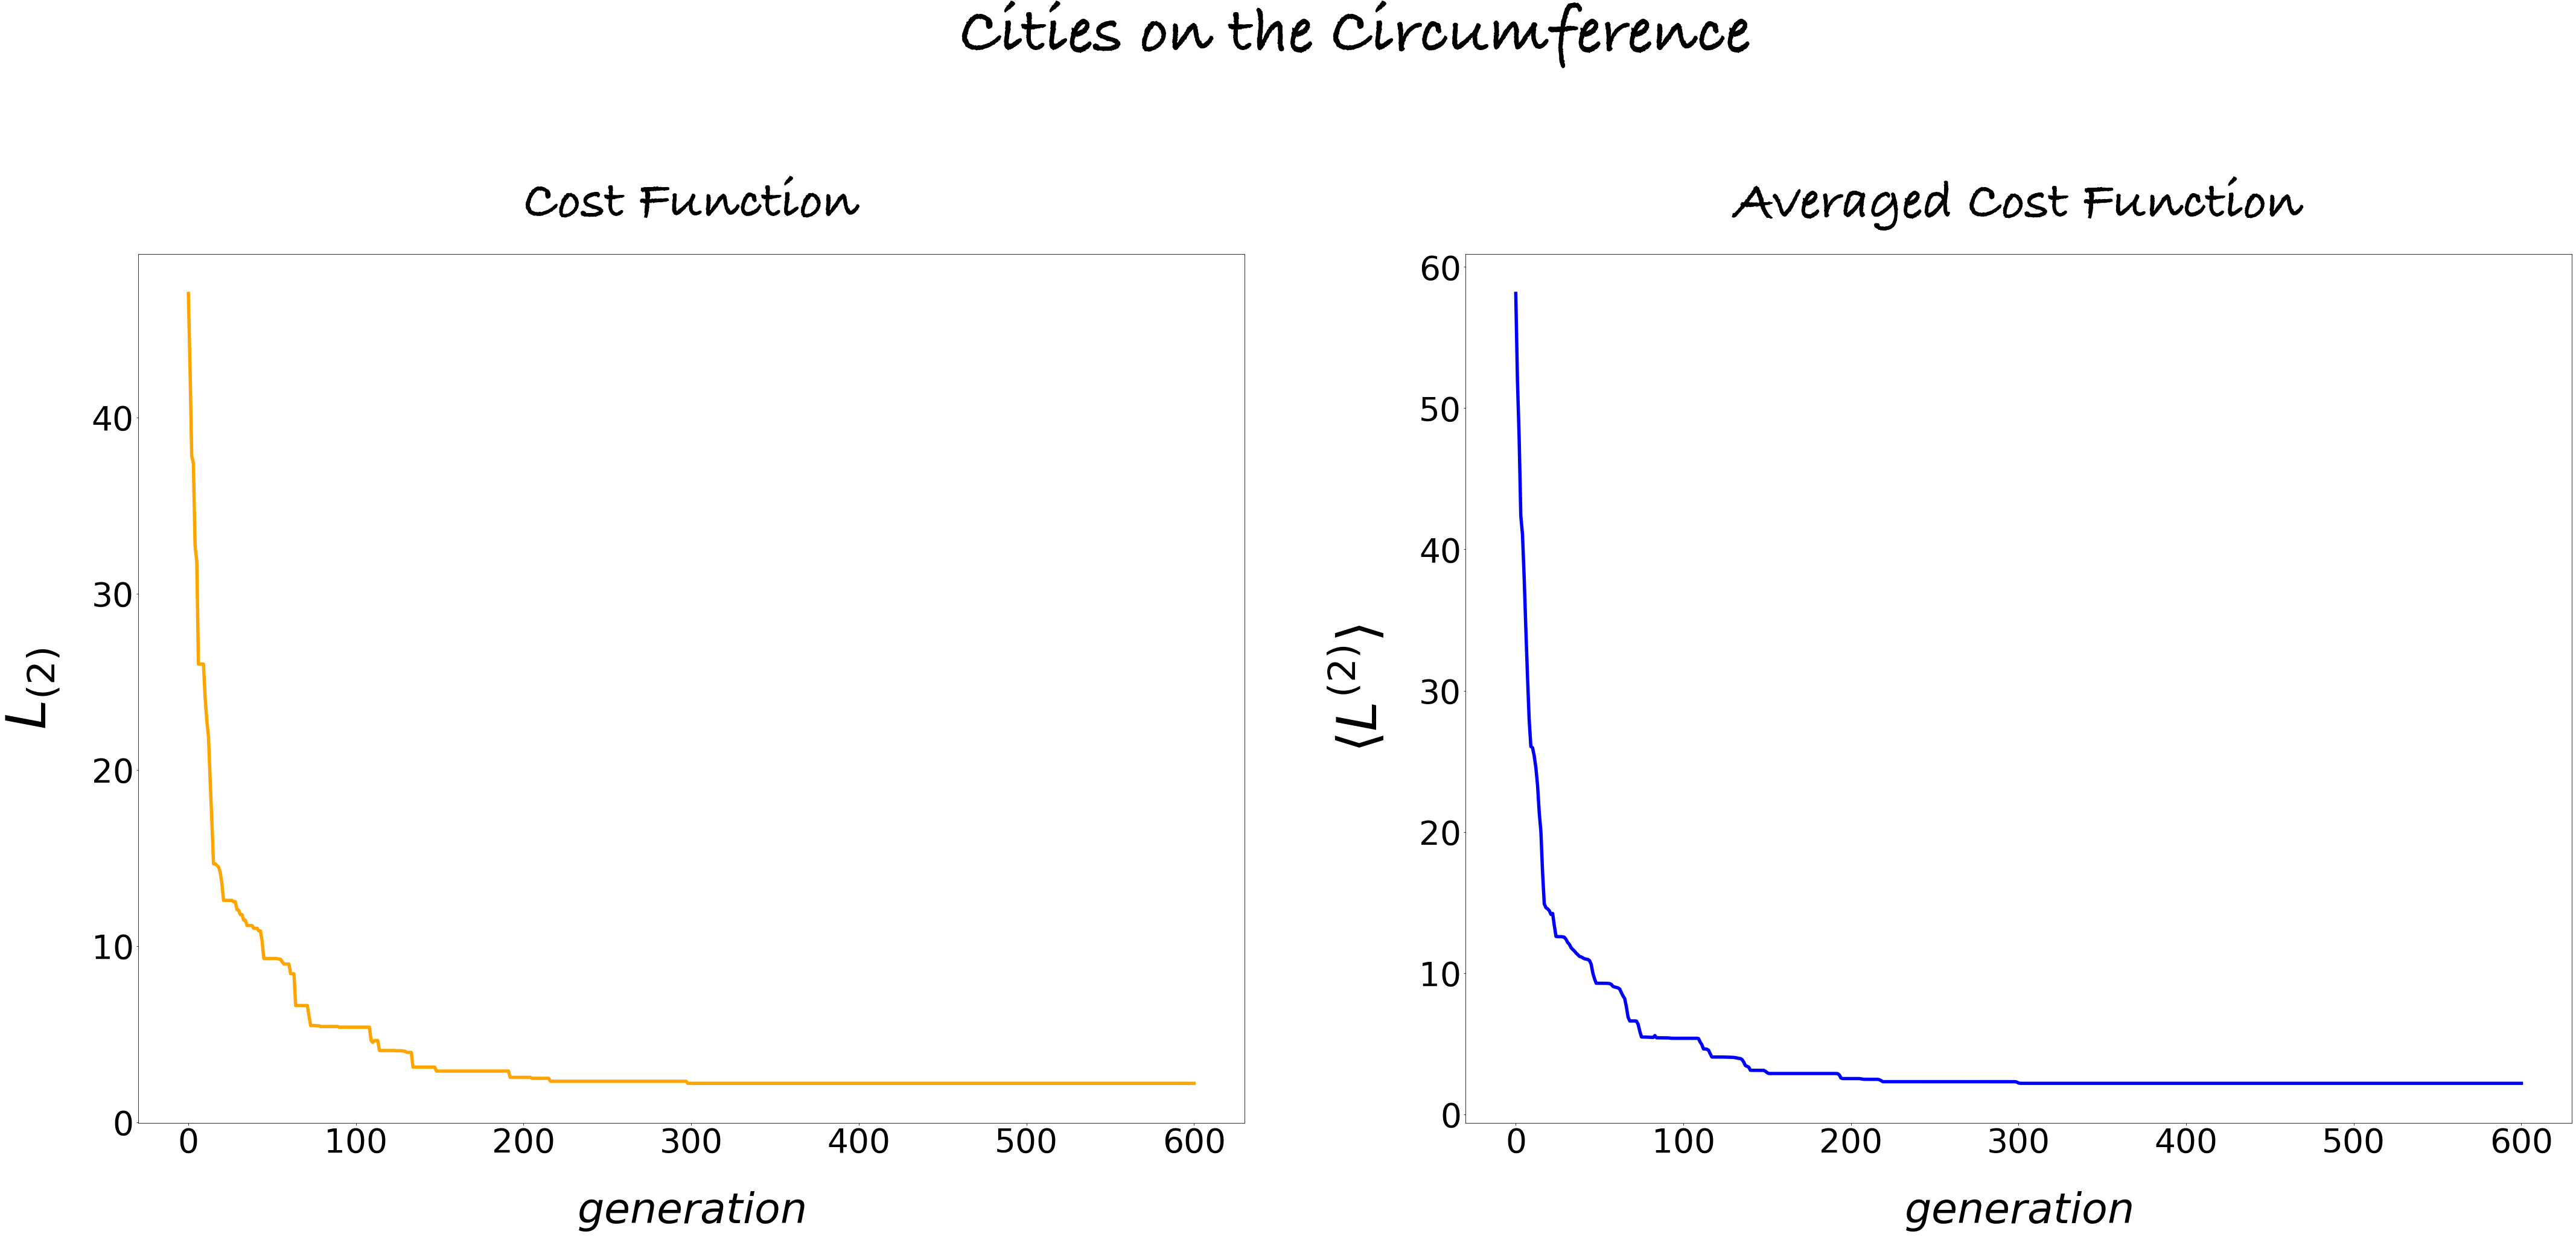

In [4]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Cities on the Circumference', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation, L_circ, linewidth=5.5, color='orange')

plt.subplot(1, 2, 2)
plt.title('Averaged Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$\\langle L^{(2)} \\rangle$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation, L_ave_circ, linewidth=5.5, color='blue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

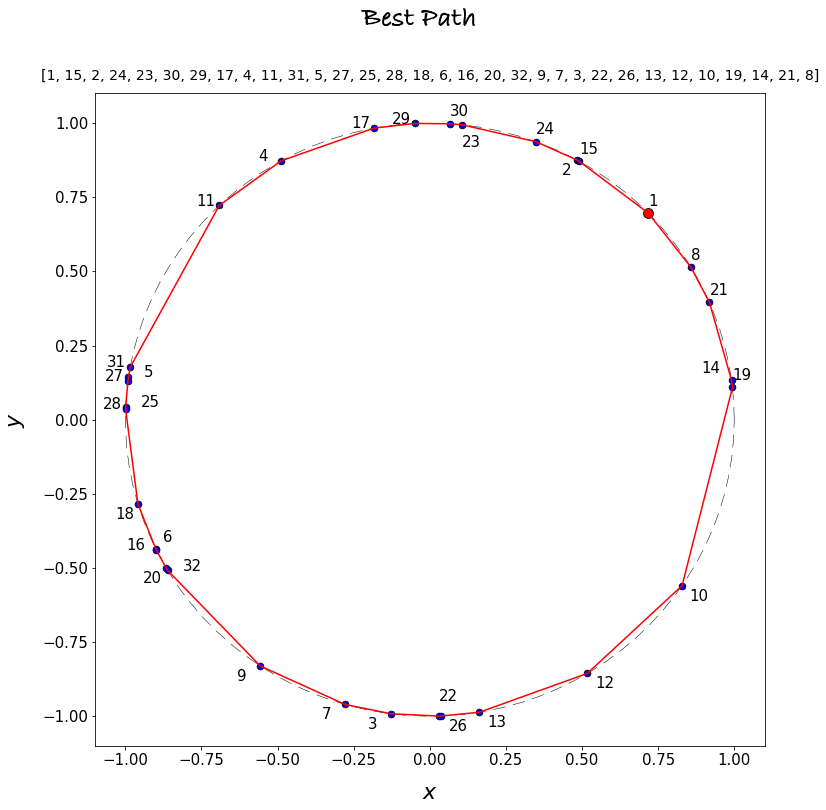

In [5]:
#Best Path
p=[]
for i in range(N_city):
    p.append(paths[len(paths)-1][i])

plt.figure(figsize=[12, 12])
plt.suptitle('Best Path', y=0.98, fontname = 'Bradley Hand', fontsize=28)
plt.title(str(p), y=1.012, fontsize=14)
plt.xlabel('$ x $', fontsize=22, labelpad=15)
plt.ylabel('$ y $', fontsize=22, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x1, x2, linewidth=0.5, color='black', linestyle='--', dashes=(25, 15))
plt.scatter(x_cities[0], y_cities[0], marker='o', color='red', 
            edgecolor='black', linewidths=0.8, s=100)
plt.scatter(x_cities[1:], y_cities[1:], marker='o', color='blue',
            edgecolor='black', linewidths=0.8, s=45)

for w in range(N_city):
    if(x_cities[w]>0.0 and y_cities[w]>0):
        if(w+1==2):
            plt.annotate(str(w+1), (x_cities[w]-0.05, y_cities[w]-0.05), fontsize=15)
        elif(w+1==14):
            plt.annotate(str(w+1), (x_cities[w]-0.1, y_cities[w]+0.025), fontsize=15)
        elif(w+1==23):
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]-0.075), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]+0.025), fontsize=15)
    elif(x_cities[w]>0.0 and y_cities[w]<0):
        if(w+1==22):
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]+0.05), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w]+0.025, y_cities[w]-0.05), fontsize=15)
    elif(x_cities[w]<0.0 and y_cities[w]<0):
        if(w+1==6):
            plt.annotate(str(w+1), (x_cities[w]+0.025, y_cities[w]+0.025), fontsize=15)
        elif(w+1==16):
            plt.annotate(str(w+1), (x_cities[w]-0.1, y_cities[w]), fontsize=15)
        elif(w+1==32):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]-0.05), fontsize=15)
    elif(x_cities[w]<0.0 and y_cities[w]>0):
        if(w+1==5):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        elif(w+1==25):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        elif(w+1==28):
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]), fontsize=15)
        else:    
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]), fontsize=15)
        
        
plt.plot(xs, ys, lw=1.5, color='red', linestyle='-', ms=10)
plt.show()

As you might have guessed, the best path (<font color='red'>red solid line</font>) found by the GA is the one that runs through all cities (clockwise or anticlockwise) starting from city $ 1 $ (<font color='red'>red point</font>) and following their order of appearance on the circumference.<br>
Initially the best path of the population has $ L = 47.0358 $, and this value is reduced as a result of the optimization until a final value of $ L =  2.19855$. Note that starting from generation $ 300  $ this value becomes constant in all the best paths of the following generations, and therefore this number of optimization steps may suffice compared to the total used. This similarly happens for the average of the lengths of the paths of the better half of the population.

Once the case related to the cities on a circumference is checked, I switch to the simulation related to the cities within the square, which I chose to have side equal to 1.<br>
I apply again my Genetic Algorithm and I plot the results thus obtained as before, using the same hyper-parameters of the previous case.

In [6]:
###################
#load the data
###################
#Cost Function
L_square = np.loadtxt("09.1/Square/L.dat", usecols=1, unpack=True)
L_ave_square = np.loadtxt("09.1/Square/L_ave.dat", usecols=1)


#Best Path
paths_square = np.loadtxt("09.1/Square/optimized_path.dat",  dtype='int', usecols=np.arange(1, N_city+1))
x_square, y_square = np.loadtxt("09.1/cities_in_square.dat", usecols=(2, 3), unpack=True)


vertices_square = []
codes_square = []
for j in paths_square[len(paths_square)-1]:
    vertices_square.append((x_square[j-1], y_square[j-1]))

vertices_square.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_square.append(Path.MOVETO)
    else:
        codes_square.append(Path.LINETO)

xs_square, ys_square = zip(*vertices_square)

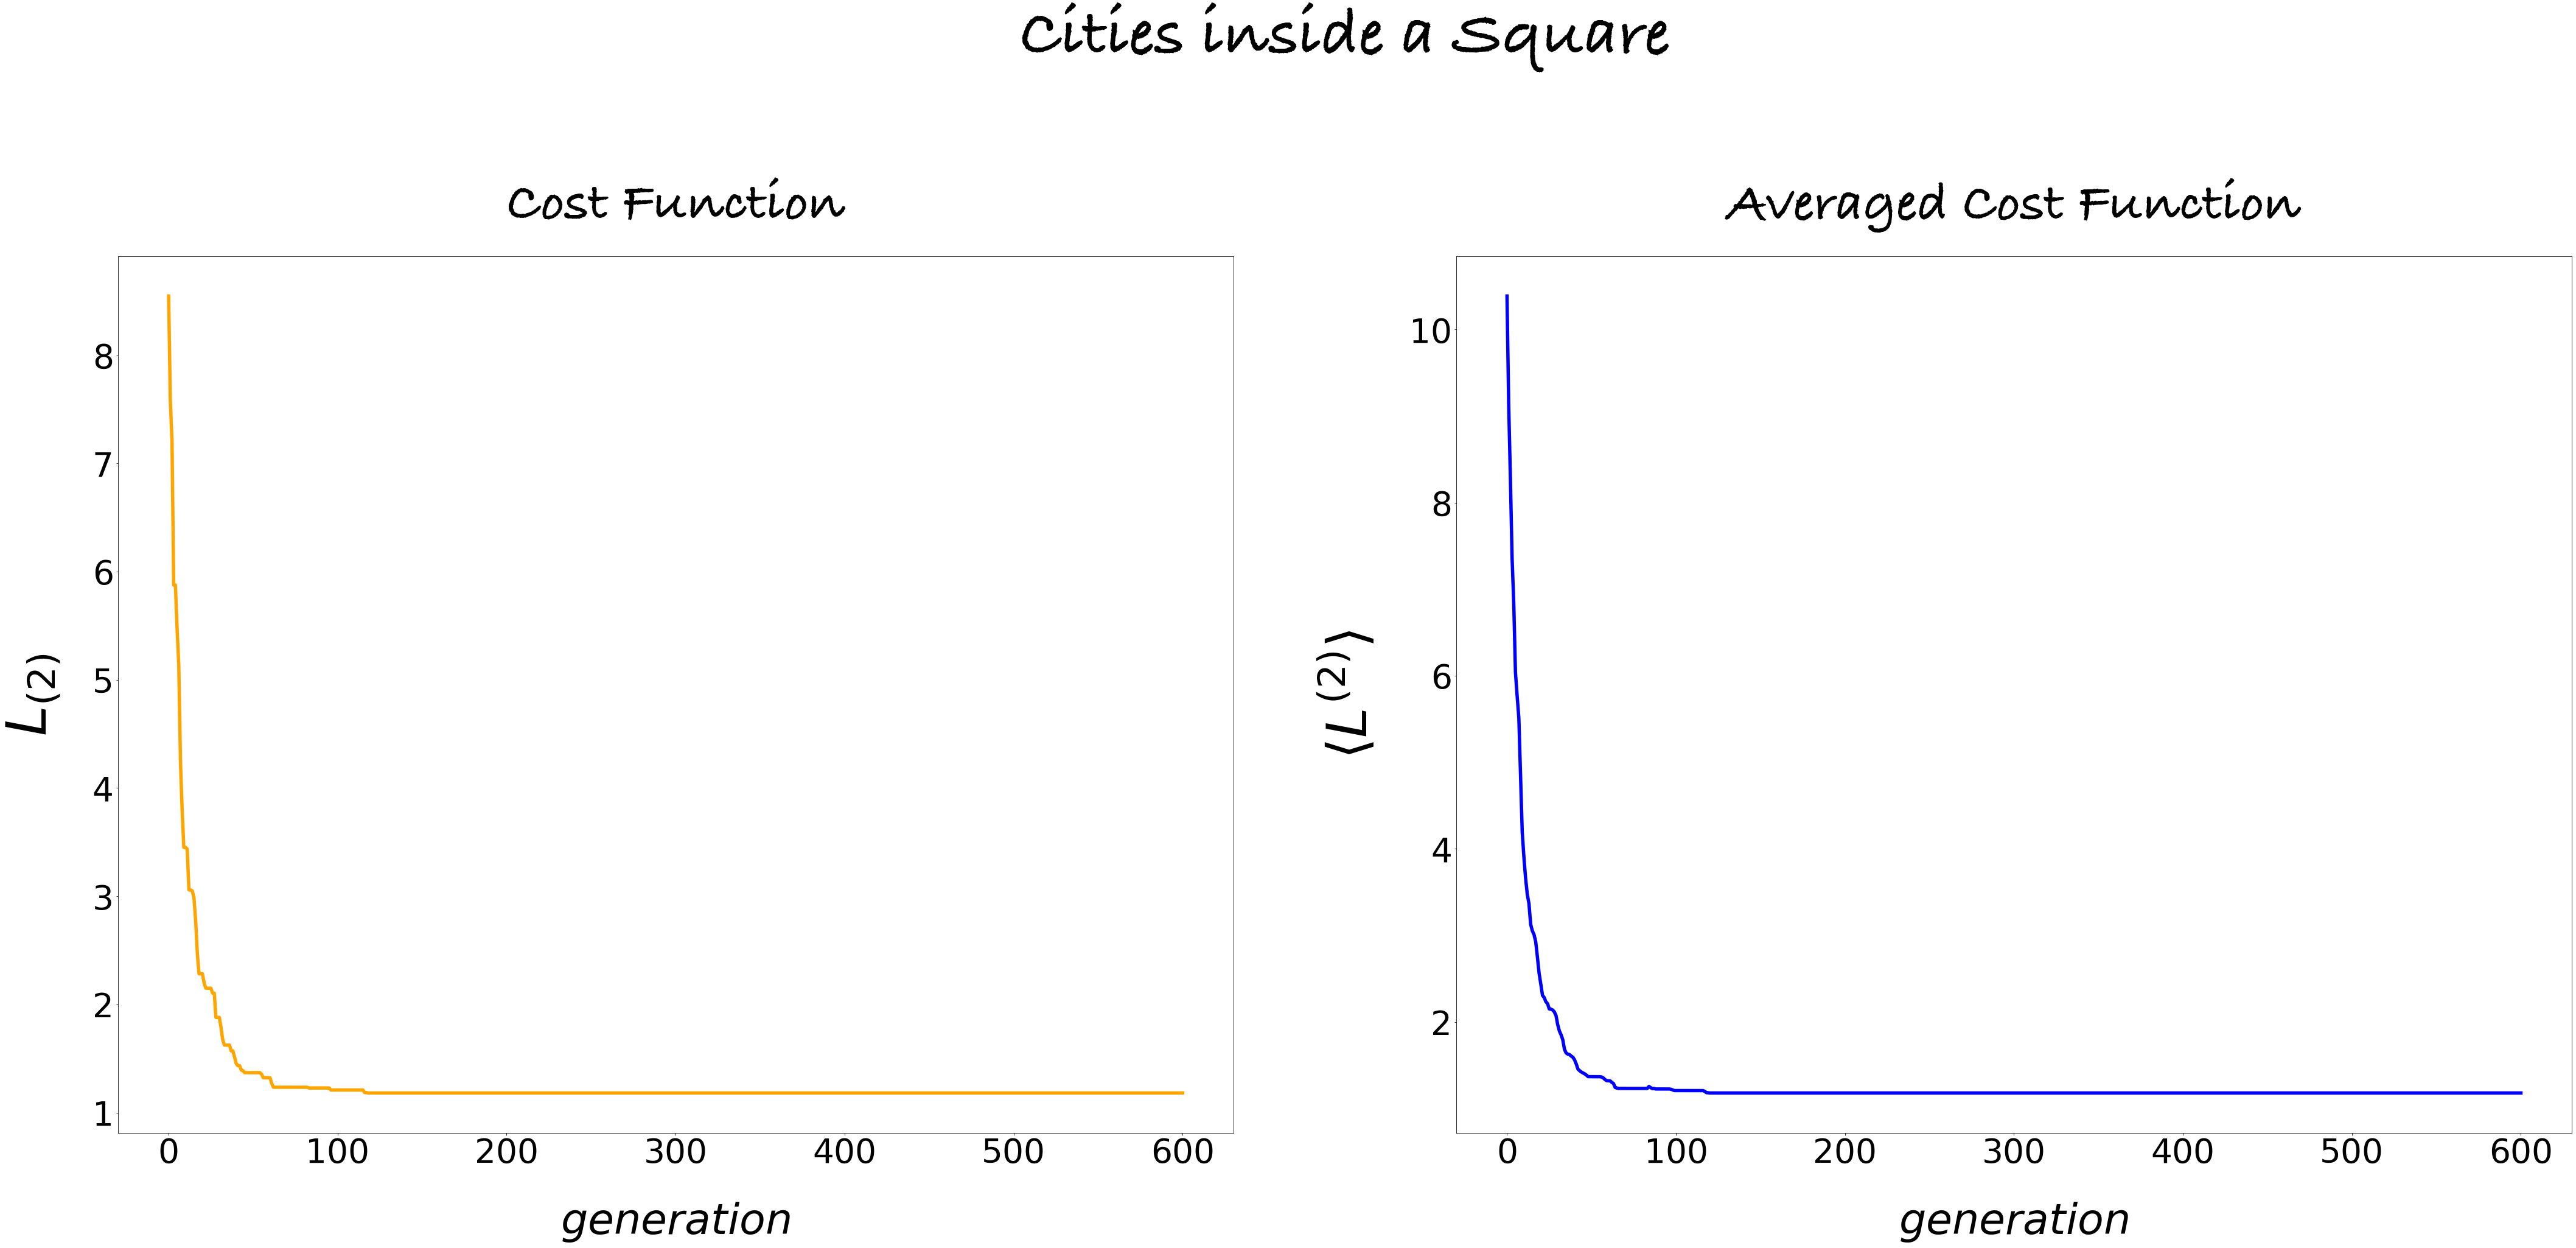

In [7]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Cities inside a Square', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation, L_square, linewidth=5.5, color='orange')

plt.subplot(1, 2, 2)
plt.title('Averaged Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$\\langle L^{(2)} \\rangle$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation, L_ave_square, linewidth=5.5, color='blue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

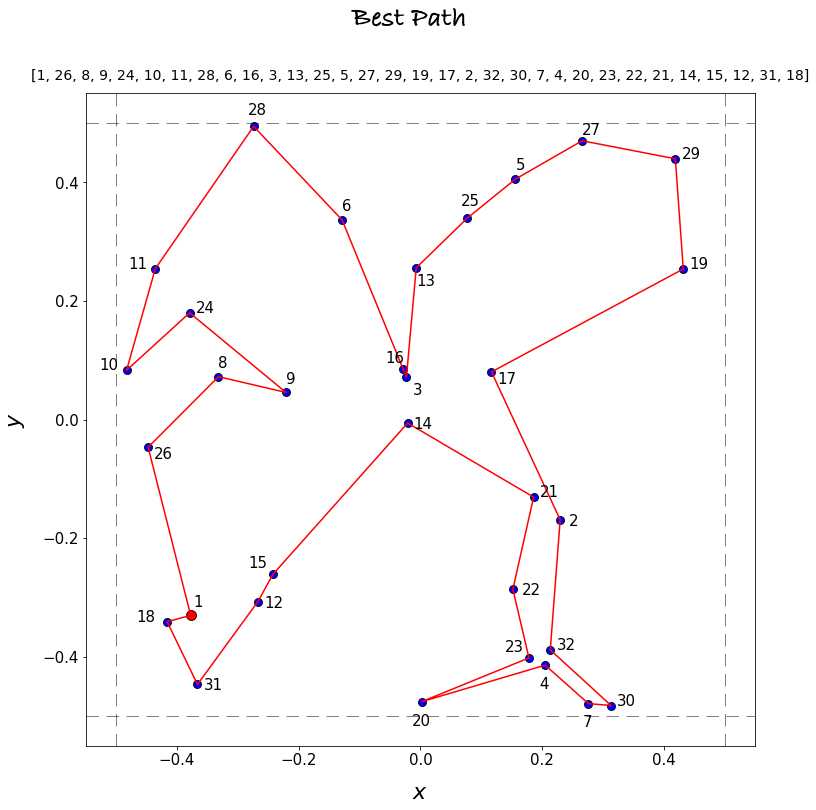

In [8]:
#Best Path
p_square=[]
for i in range(N_city):
    p_square.append(paths_square[len(paths_square)-1][i])

plt.figure(figsize=[12, 12])
plt.suptitle('Best Path', y=0.98, fontname = 'Bradley Hand', fontsize=28)
plt.title(str(p_square), y=1.012, fontsize=14)
plt.xlabel('$ x $', fontsize=22, labelpad=15)
plt.ylabel('$ y $', fontsize=22, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#SQUARE
plt.axhline(y=+0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=0.8, s=100)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=0.8, s=65)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=15)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=15)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=15)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=15)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=15)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=15)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=15)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=15)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=15)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=15)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=15)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=15)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=15)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=15)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=15)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=15)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=15)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=15)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=15)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=15)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=15)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=15)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=15)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=15)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=15)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=15)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=15)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=15)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=15)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=15)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=15)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=15)
#PATH
plt.plot(xs_square, ys_square, lw=1.5, color='red', linestyle='-', ms=10)

plt.show()

The solution found by the GA seems to be sensible also in this case and, as described in the case of the circumference, from generation $ 300 $ the optimization seems to have reached the global minimum of the problem, which remains unchanged until the last generation. In this simulation the best path of the starting population has $ L = 8.54762 $, and this value is reduced to $ L = 1.18115 $.<br>
Even the absence of crossings suggests a correct solution by the algorithm. I would also like to point out the speed with which the GA reaches the solutions drawn above in both cases: a few seconds are needed to generate the population of the $ 600 $th generation.<br>
Obviously I could work more on the hyper-parameters of my code, or implement further operators of mutation, or change the strategy of crossover and selection, but for the moment I am satisfied of the solutions found so far.


To conclude, I show how the best path within the population changes in time (that is, as the population evolves over the generations) in both simulations that I did.
It will be clearly visible in these two animations as, starting from approximately generation $ 300 $, the best path no longer changes, having reached the minimum value of $ L $.

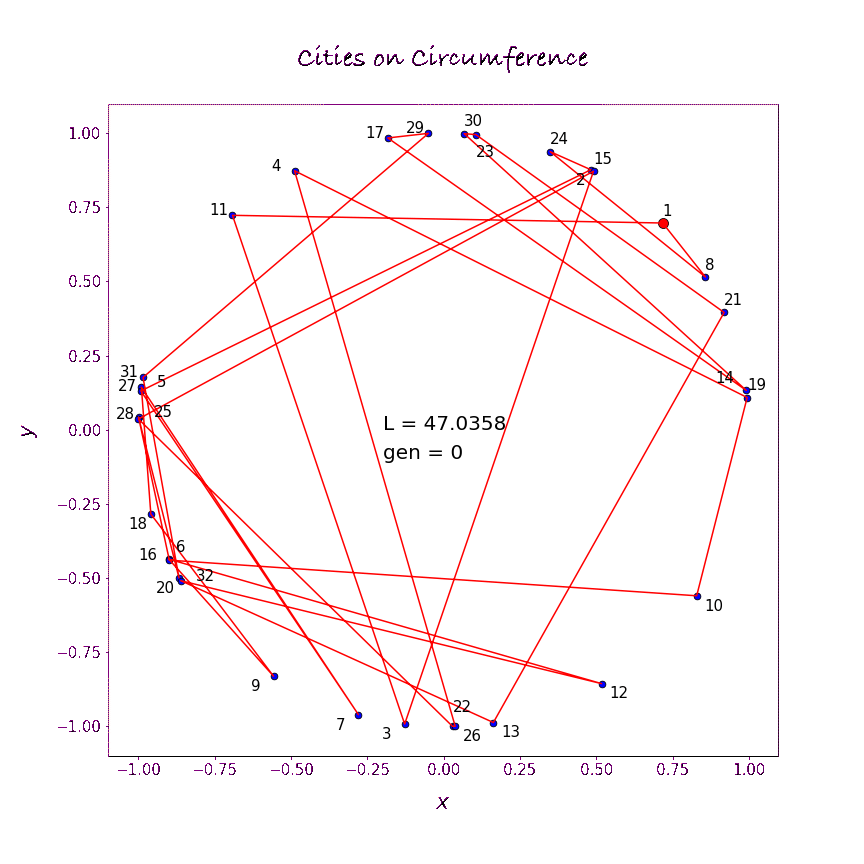

In [9]:
Image('circ_optimization.gif')

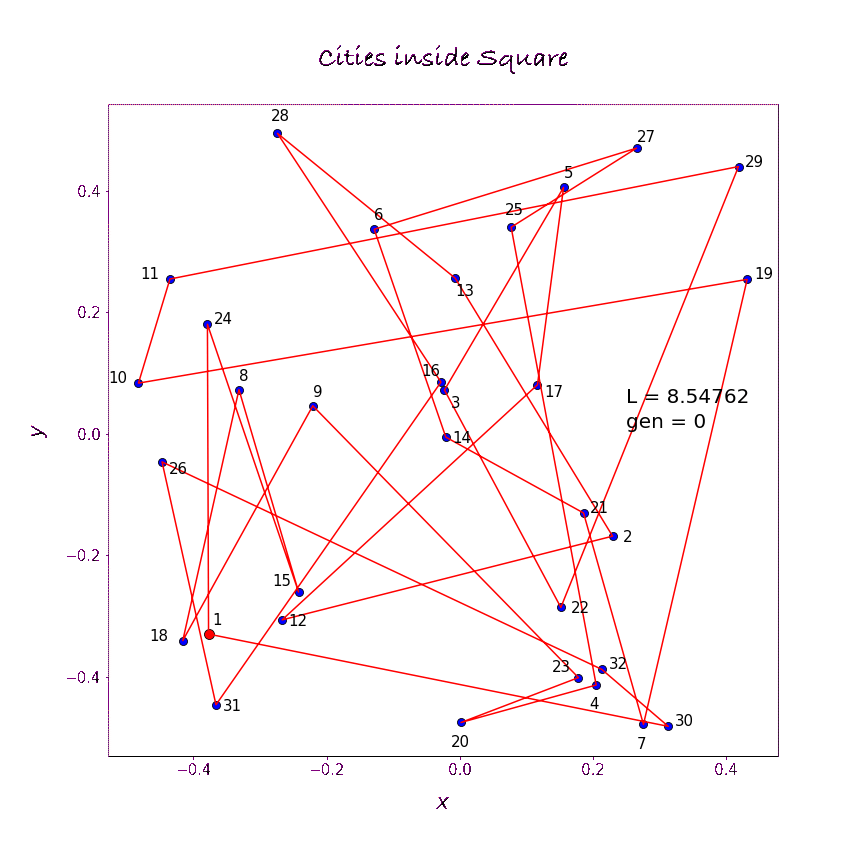

In [10]:
Image('square_optimization.gif')